## Projeto de Mineração de Dados: Predição de Diabetes em Pacientes Pima Indians

#### Ramon B. Miranda - 36962376
`Kahn, M.  Diabetes [Dataset]. UCI Machine Learning Repository.`https://doi.org/10.24432/C5T59G.

### 1. Descrição do Projeto
#### 1.1 Definição do Problema
O objetivo deste projeto é desenvolver um modelo preditivo capaz de identificar a presença de diabetes em pacientes com base em características clínicas e demográficas. A precisão na predição pode auxiliar profissionais de saúde na triagem e no diagnóstico precoce da doença.

#### 1.2 Base de Dados
- Nome: Pima Indians Diabetes Database
- Fonte: [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/34/diabetes) 
- Características: 768 registros de pacientes.

#### 1.3 Variáveis do Dataset
- Pregnancies: Número de gestações
- Glucose: Concentração de glicose no plasma
- BloodPressure: Pressão arterial diastólica (mm Hg)
- SkinThickness: Espessura da dobra cutânea do tríceps (mm)
- Insulin: Níveis de insulina sérica (mu U/ml)
- BMI: Índice de massa corporal (peso em kg/(altura em m)^2)
- DiabetesPedigreeFunction: Função de pedigree de diabetes
- Age: Idade (anos)
- Outcome: Variável alvo (0 ou 1), indicando a ausência ou presença de diabetes

### 2. Extração, Tratamento e Transformação dos Dados
#### 2.1 Carregamento e Análise Inicial

In [79]:
import pandas as pd

# Carregar o dataset
df = pd.read_csv('diabetes_dataset_20241203_144657.csv')

# Visão inicial dos dados
print(df.head())
print(df.info())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

#### 2.2 Análise Exploratória e Pré-processamento

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

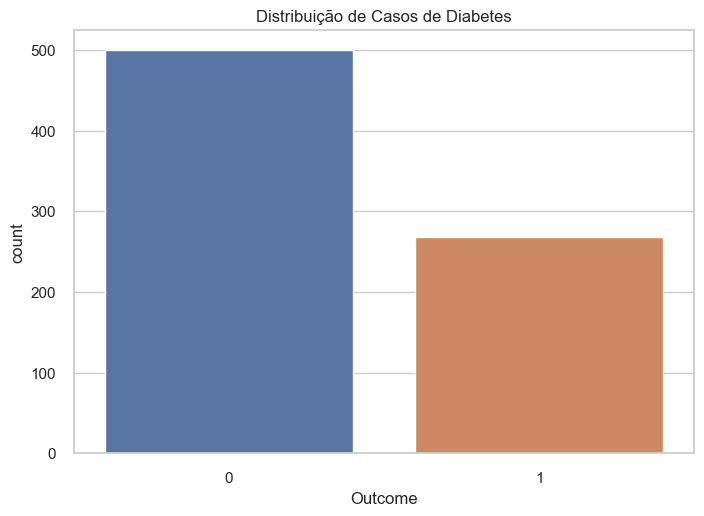

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estatísticas descritivas
print(df.describe())

# Distribuição da variável alvo
sns.countplot(x='Outcome', data=df)
plt.title('Distribuição de Casos de Diabetes')
plt.show()

#### 2.4 Tratamento dos Dados

In [81]:
import numpy as np

# Tratamento de valores zero em colunas específicas
colunas_para_tratar = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for coluna in colunas_para_tratar:
    media = df[df[coluna] != 0][coluna].mean()
    df[coluna] = df[coluna].replace(0, media)

# Verificação de outliers (exemplo usando IQR)
for coluna in df.columns:
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[coluna] < (Q1 - 1.5 * IQR)) | (df[coluna] > (Q3 + 1.5 * IQR)))]

### 3. Modelagem
#### 3.1 Divisão do Conjunto de Dados em Treinamento e Teste

In [82]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 3.2 Preparação dos Dados

In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 3.3 Treinamento e Avaliação do Modelo

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train_scaled, y_train)

# Avaliação no conjunto de treinamento
previsoes_treino = modelo.predict(X_train_scaled)
print("Relatório de Classificação (Treinamento):")
print(classification_report(y_train, previsoes_treino))

Relatório de Classificação (Treinamento):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       240
           1       1.00      1.00      1.00       129

    accuracy                           1.00       369
   macro avg       1.00      1.00      1.00       369
weighted avg       1.00      1.00      1.00       369



#### 3.4 Teste do Modelo

Acurácia no conjunto de teste: 0.73

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

           0       0.75      0.89      0.81        62
           1       0.65      0.42      0.51        31

    accuracy                           0.73        93
   macro avg       0.70      0.65      0.66        93
weighted avg       0.72      0.73      0.71        93



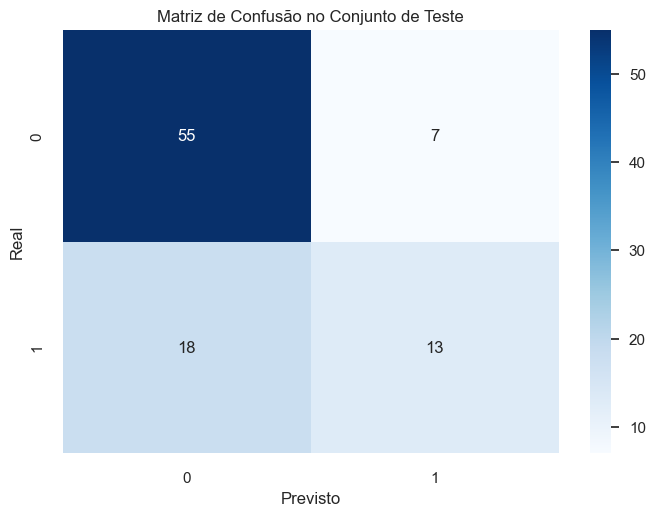

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Previsão no conjunto de teste
previsoes_teste = modelo.predict(X_test_scaled)

# Cálculo da acurácia no conjunto de teste
acuracia_teste = accuracy_score(y_test, previsoes_teste)
print(f"Acurácia no conjunto de teste: {acuracia_teste:.2f}")

# Relatório de Classificação no conjunto de teste
print("\nRelatório de Classificação (Teste):")
print(classification_report(y_test, previsoes_teste))

# Matriz de confusão
sns.heatmap(confusion_matrix(y_test, previsoes_teste), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão no Conjunto de Teste')
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.show()

### 4. Avaliação dos Resultados
#### 4.1 Métricas de Performance
### Classe 0 (Ausência de Diabetes):
- Das previsões que o modelo fez para a ausência de diabetes, 75% estavam corretas.
- O modelo conseguiu identificar 89% de todos os casos reais de ausência de diabetes.
- O F1-score mostra um bom equilíbrio entre precisão e recall para esta classe, indicando que o modelo é confiável na identificação de pessoas sem diabetes.

### Classe 1 (Presença de Diabetes):
- O modelo prevê a presença de diabetes corretamente em 65% das vezes. Isso indica que há um número considerável de falsos positivos (previsões incorretas de diabetes).
- O recall de 42% é relativamente baixo, sugerindo que o modelo está falhando em identificar muitos casos reais de diabetes, resultando em falsos negativos (casos de diabetes não detectados).
- F1-Score (0.51): O F1-score de 0.51 reflete o desequilíbrio entre precisão e recall nesta classe, indicando que o modelo tem dificuldades em prever corretamente a presença de diabetes.

#### Interpretação Geral:
O modelo parece ser mais eficaz em prever a ausência de diabetes do que a presença. Isso pode ser devido a um desbalanceamento nos dados, onde há mais exemplos da classe 0 do que da classe 1, ou pode indicar que o modelo precisa de ajustes para melhor capturar os padrões associados à presença de diabetes. Em um contexto clínico, melhorar o recall para a classe 1 seria crucial, pois identificar corretamente os casos de diabetes é vital para o tratamento e manejo adequados da doença. Ajustes no modelo ou o uso de técnicas de balanceamento de dados podem ajudar a melhorar o desempenho na classe 1.

### 4.2 Importância das Features

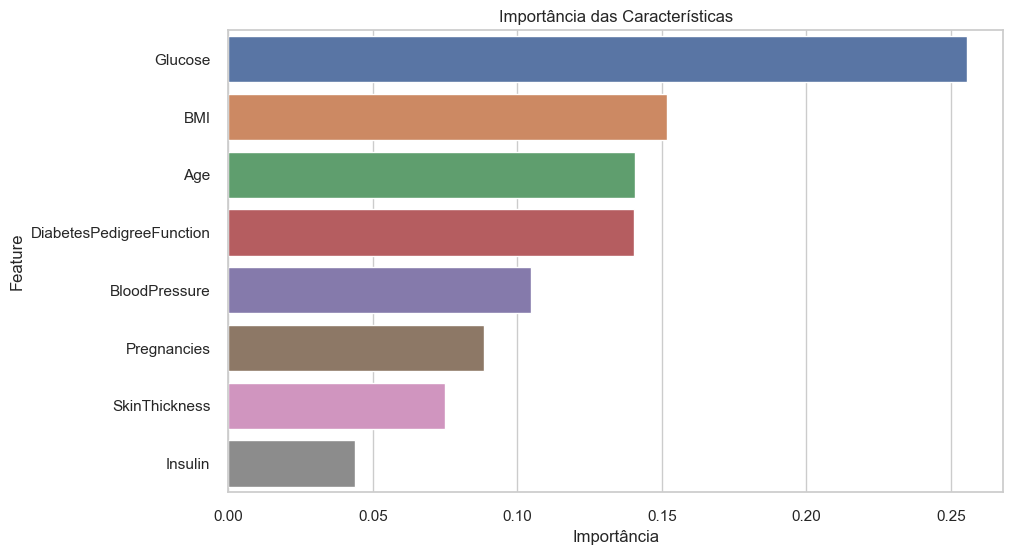


Ranking de Importância das Features:
                    Feature  Importância
1                   Glucose     0.255395
5                       BMI     0.151738
7                       Age     0.140650
6  DiabetesPedigreeFunction     0.140475
2             BloodPressure     0.104668
0               Pregnancies     0.088366
3             SkinThickness     0.074798
4                   Insulin     0.043910


In [86]:
# Análise de importância das features
importancia = pd.DataFrame({
    'Feature': X.columns,
    'Importância': modelo.feature_importances_
}).sort_values('Importância', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importância', y='Feature', data=importancia)
plt.title('Importância das Características')
plt.show()

print("\nRanking de Importância das Features:")
print(importancia)

Identificar quais características do conjunto de dados têm maior impacto nas previsões do modelo. Isso ajuda a entender melhor o modelo e a biologia subjacente à doença.

### 5. Conclusões e Recomendações
O modelo Random Forest apresentou uma boa acurácia na predição de diabetes em pacientes do conjunto de dados Pima Indians, porém ainda seria recomendado explorar outros algoritmos de machine learning e realizar uma otimização de hiperparâmetros para potencialmente melhorar a performance. Além disso, o uso de mais dados e variáveis adicionais pode contribuir para um modelo ainda mais robusto.